In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [6]:
df=pd.read_excel("iran.new.xlsx",sheet_name="Iran")

In [7]:
df

Date Country/Territory/Area  Confirmed Cases  \
0   2020-02-23              Australia               22   
1   2020-02-19              Australia               15   
2   2020-02-15              Australia               15   
3   2020-02-11              Australia               15   
4   2020-02-07              Australia               15   
..         ...                    ...              ...   
149 2020-02-19                Vietnam               16   
150 2020-02-15                Vietnam               16   
151 2020-02-11                Vietnam               15   
152 2020-02-07                Vietnam               12   
153 2020-02-03                Vietnam                8   

     Exposure under investigation  Total Deaths  Exposure in China  \
0                               0             0                 12   
1                               0             0                 12   
2                               0             0                 12   
3                               0             0                 15   
4                               0             0                 15   
..                            ...           ...                ...   
149                             0             0                  8   
150                             0             0                  8   
151                             1             0                  8   
152                             0             0                  7   
153                             0             0                  6   

     Exposure outside China   
0                         10  
1                          3  
2                          3  
3                          0  
4                          0  
..                       ...  
149                        8  
150                        8  
151                        6  
152                        5  
153                        2  

[154 rows x 7 columns]

In [8]:
df=df.groupby(df['Date']).sum()

In [9]:
df

Confirmed Cases  Exposure under investigation  Total Deaths  \
Date                                                                      
2020-02-03              153                             6             1   
2020-02-07              270                            66             1   
2020-02-11              395                           146             1   
2020-02-15              526                           229             2   
2020-02-19              924                           570             3   
2020-02-23             1769                           965            17   

            Exposure in China  Exposure outside China   
Date                                                    
2020-02-03                123                       24  
2020-02-07                150                       54  
2020-02-11                165                       84  
2020-02-15                170                      127  
2020-02-19                174                      180  
2020-02-23                178                      626

In [10]:
df.reset_index()

Date  Confirmed Cases  Exposure under investigation  Total Deaths  \
0 2020-02-03              153                             6             1   
1 2020-02-07              270                            66             1   
2 2020-02-11              395                           146             1   
3 2020-02-15              526                           229             2   
4 2020-02-19              924                           570             3   
5 2020-02-23             1769                           965            17   

   Exposure in China  Exposure outside China   
0                123                       24  
1                150                       54  
2                165                       84  
3                170                      127  
4                174                      180  
5                178                      626

In [11]:
day=pd.Series([1,2,3,4,5,6])

In [12]:
df.set_index(day)

Confirmed Cases  Exposure under investigation  Total Deaths  \
1              153                             6             1   
2              270                            66             1   
3              395                           146             1   
4              526                           229             2   
5              924                           570             3   
6             1769                           965            17   

   Exposure in China  Exposure outside China   
1                123                       24  
2                150                       54  
3                165                       84  
4                170                      127  
5                174                      180  
6                178                      626

In [13]:
cases=df['Confirmed Cases']

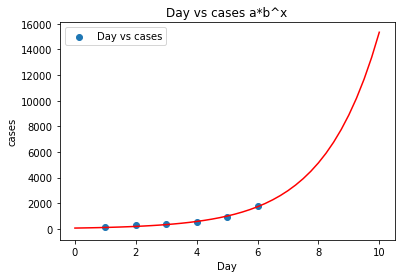

In [14]:
def func3(x, a, b):
    return a * b ** x
popt, pcov = curve_fit(func3, day,cases, p0=[1, 1e-6])


x_plot=np.linspace(0,10,41)
plt.plot(x_plot, func3(x_plot, *popt), 'r-')
plt.scatter(day,cases,label='Day vs cases')
plt.title("Day vs cases a*b^x")
plt.xlabel('Day')
plt.ylabel('cases')
plt.legend()
plt.show()

In [15]:
a=popt[0].round(4)
b=popt[1].round(4)
a

65.3967

In [16]:
b

1.7259

In [17]:
print(f'The equation of regression line is y={a}*{b}^x')

The equation of regression line is y=65.3967*1.7259^x


In [18]:
y_plot=func3(x_plot,*popt)

In [19]:
y_plot

array([   65.39668068,    74.95657627,    85.91396792,    98.47314608,
         112.868265  ,   129.36770837,   148.27909305,   169.95500433,
         194.79956953,   223.2759926 ,   255.91519012,   293.32568975,
         336.20497567,   385.35249252,   441.68455031,   506.25140818,
         580.25685549,   665.08065539,   762.3042692 ,   873.74034132,
        1001.46649428,  1147.8640641 ,  1315.66249813,  1507.99024303,
        1728.43307179,  1981.10093713,  2270.70459779,  2602.64344628,
        2983.10617552,  3419.18616134,  3919.0137119 ,  4491.90764976,
        5148.5490527 ,  5901.18039259,  6763.83378491,  7752.59260457,
        8885.89134561, 10184.85931525, 11673.71457031, 13380.21544048,
       15336.17805673])

In [20]:
expALLDf=pd.DataFrame(list(zip(x_plot,y_plot)),columns=['day','predicted cases'])

In [22]:
expALLDf.to_csv(r'iran.final.csv')